Plotting the bifurcation diagram of few chaotic dynamical system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cl
%matplotlib inline

In [84]:
def logistic(r, x):
    return r*x*(1-x)**(1/2)

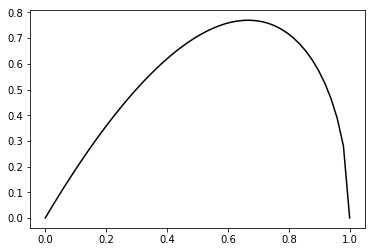

In [85]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'k')

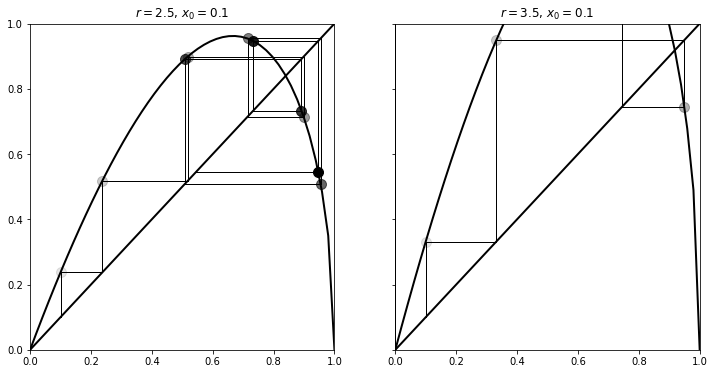

In [86]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)

In [102]:
n = 20000
r = np.linspace(2.4, 2.6, n)

In [103]:
iterations = 2000
last = 100

In [104]:
x = 1e-5 * np.ones(n)

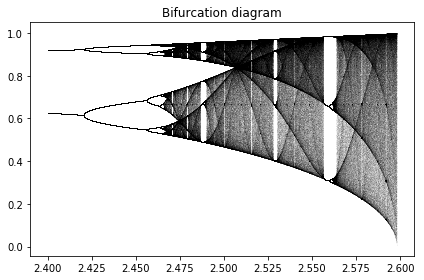

In [107]:
# x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
# ax.plot(x, logistic(2, x), 'k')
y = []
for i in range(iterations):
    x = logistic(r, x)
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax.plot(r, x, '.k', alpha=.1, ms=0.2)
#         y.append(r)
ax.set_title("Bifurcation diagram")
plt.tight_layout()
plt.savefig('filename.png', dpi=1200)

In [10]:
# x = np.linspace(0, 1)
n = 2000
r = np.linspace(1, 5, n)

iterations = 2000
last = 200

x = 1e-5 * np.ones(n)

y = []
for i in range(iterations):
    x = logistic(r, x)
    if i >= (iterations - last):
        y.append(r)

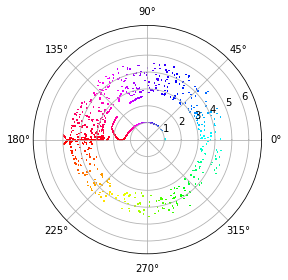

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

colormap = plt.get_cmap('hsv')
norm = cl.Normalize(0.0, 2*np.pi)

for yn in y:
    plt.scatter(x*np.pi, yn, 0.2, marker=',', c=x*np.pi, alpha=.1, cmap=colormap)

# plt.polar(x*np.pi, y[0], '.k', alpha=.5, ms=0.25)
# plt.scatter(x*np.pi, y[0], 0.01, marker='.', c=x*np.pi, alpha=.1, cmap=colormap)
plt.tight_layout()
plt.savefig('filename2.png', dpi=300)

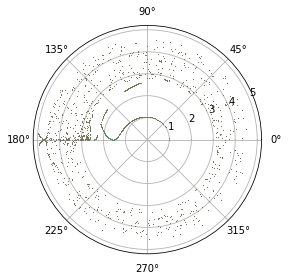

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

colormap = plt.get_cmap('hsv')
norm = cl.Normalize(0.0, 2*np.pi)

for yn in y:
    plt.plot(x*np.pi, yn, '.', alpha=.2, ms=0.1)
# plt.plot(x*np.pi, yn, '.', alpha=.1, ms=0.1)
# plt.polar(x*np.pi, y[0], '.k', alpha=.5, ms=0.25)
# plt.scatter(x*np.pi, y[0], 0.01, marker='.', c=x*np.pi, alpha=.1, cmap=colormap)
plt.tight_layout()
plt.savefig('filename2.png', dpi=300)